<p><font size="5">
PneumoCatcher - Automated Pneumonia Detection from Chest X-Rays Using Deep Learning
</font></p>

# Table of Contents

**Intro**
1. Demo for Presentation  
2. Introduction  
**Preprocessing**  
3. Preprocessing the Data (Phase 1, locally)  
4. Preprocessing the Data (Phase 2, Google Colab)  
**Building and Training the Models**
5. Building and Training Model 1 (Custom CNN Model)  
6. Training Model 2 (ResNet-50 Model with one phase of Fine-Tuning)  
7. Training Model 3 (ResNet-50 Model with two phases of Fine-Tuning)  
**Evaluations**
8. Model Evaluations  
**Grad-CAM**
9. Grad-CAM Visualizations

# 1. Demo for Presentation

## 1.0 Set up

### Set up for 1.1 Dataset

In [ ]:
# downloading the "x_ray_full_dataset.h5" data file
!pip install gdown
!gdown 1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9

Downloading...
From (original): https://drive.google.com/uc?id=1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9
From (redirected): https://drive.google.com/uc?id=1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9&confirm=t&uuid=3084d92f-c52b-4720-9246-20aada34f97c
To: /content/x_ray_full_dataset.h5
100% 190M/190M [00:05<00:00, 34.7MB/s]


In [ ]:
# converting the "x_ray_full_dataset.h5" file to numpy arrays
import h5py
import numpy as np

with h5py.File('x_ray_full_dataset.h5', 'r') as h5_file:
    X = np.array(h5_file['images'])
    y = np.array(h5_file['labels'])

print(X.shape, y.shape)

(5856, 180, 180) (5856,)


In [ ]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

print(f"X_train.shape: {X_train.shape}   y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}   y_test.shape: {y_test.shape}")
print(f"X_val.shape: {X_val.shape}   y_val.shape: {y_val.shape}")

X_train.shape: (4215, 180, 180, 1)   y_train.shape: (4215,)
X_test.shape: (1172, 180, 180, 1)   y_test.shape: (1172,)
X_val.shape: (469, 180, 180, 1)   y_val.shape: (469,)


### Set up for 1.2 Predictions

In [ ]:
# downloading the "pneumonia_detection_model.keras" data file
!gdown 1meyD_R7w54JJelG56IhGUTKL2CTG1Eso

# downloading the "v1_resnet50.keras" model file
!gdown 10_7s75UuntrsneolMDKGJpDMzNYby73F

# downloading the "v3_resnet50.keras" model file
!gdown 1SjIa614iaKPark3mWva6A_L-wYRAZaoq

Downloading...
From (original): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso
From (redirected): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso&confirm=t&uuid=fc823e43-0b7d-4f50-bf53-6cf412c377df
To: /content/pneumonia_detection_model.keras
100% 79.8M/79.8M [00:01<00:00, 40.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F
From (redirected): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F&confirm=t&uuid=c1bf8f86-fd23-4755-ad67-5a13b599383a
To: /content/v1_resnet50.keras
100% 120M/120M [00:03<00:00, 31.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq
From (redirected): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq&confirm=t&uuid=f07f0e0c-cbec-4068-ba35-b6c850db5ba2
To: /content/v3_resnet50.keras
100% 192M/192M [00:04<00:00, 39.5MB/s]


In [ ]:
import tensorflow as tf

# load the models
model_1 = tf.keras.models.load_model("pneumonia_detection_model.keras")
model_2 = tf.keras.models.load_model("v1_resnet50.keras")
model_3 = tf.keras.models.load_model("v3_resnet50.keras")

# predictions
y_pred_probs_model_1 = model_1.predict(X_test)
y_pred_probs_model_2 = model_2.predict(np.concatenate((X_test,X_test,X_test), axis=3))
y_pred_probs_model_3 = model_3.predict(np.concatenate((X_test,X_test,X_test), axis=3))

y_pred_model_1 = (y_pred_probs_model_1 > 0.5).astype(int).flatten()
y_pred_model_2 = (y_pred_probs_model_2 > 0.5).astype(int).flatten()
y_pred_model_3 = (y_pred_probs_model_3 > 0.5).astype(int).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step


## 1.1 Dataset

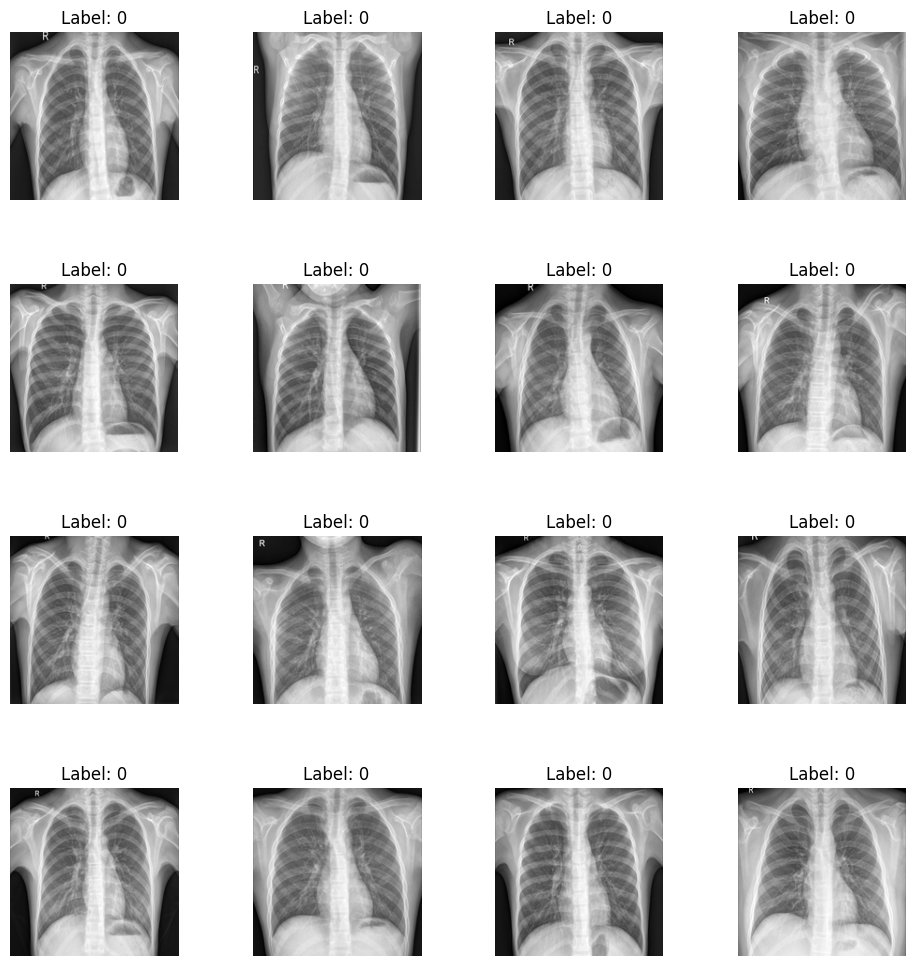

In [ ]:
# displaying 16 data points
import numpy as np
import matplotlib.pyplot as plt

def display_x_rays(X, y, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap='gray')
        ax.set_title(f'Label: {y[i]}')
        ax.axis('off')
    plt.show()

display_x_rays(X, y)

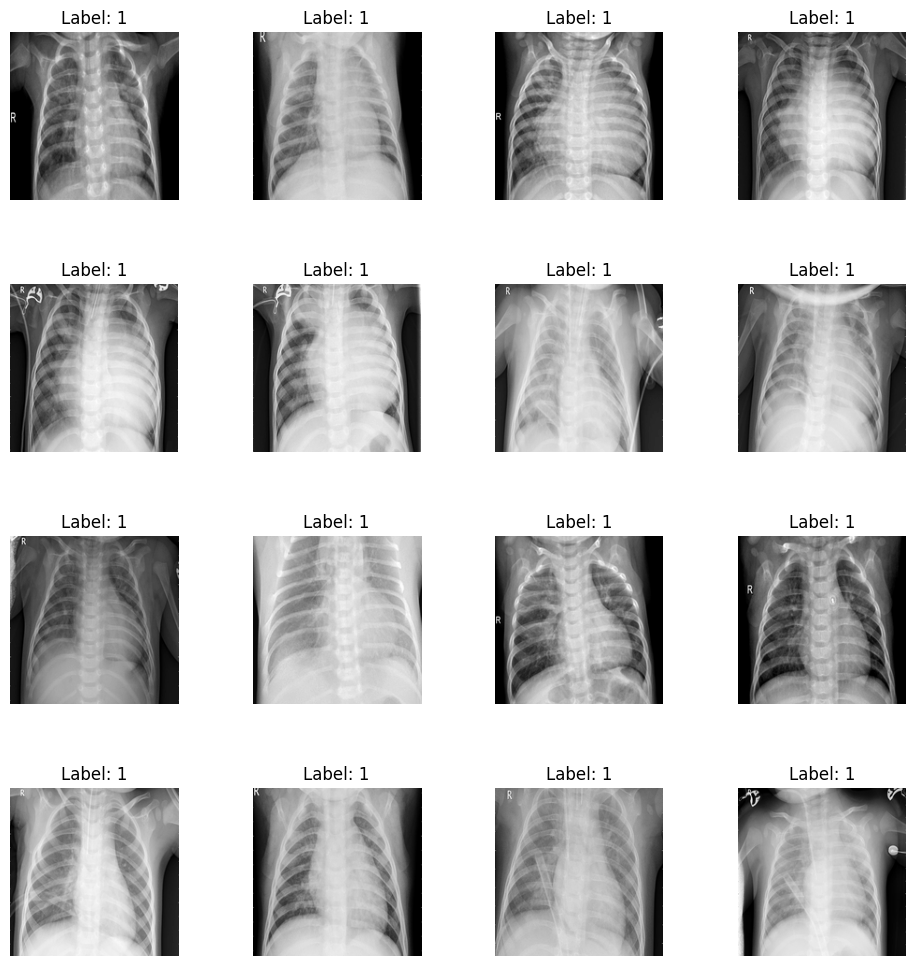

In [ ]:
# displaying 16 data points
import numpy as np
import matplotlib.pyplot as plt

def display_x_rays(X, y, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap='gray')
        ax.set_title(f'Label: {y[i]}')
        ax.axis('off')
    plt.show()

display_x_rays(X[5000:], y[5000:])

## 1.2 Predictions

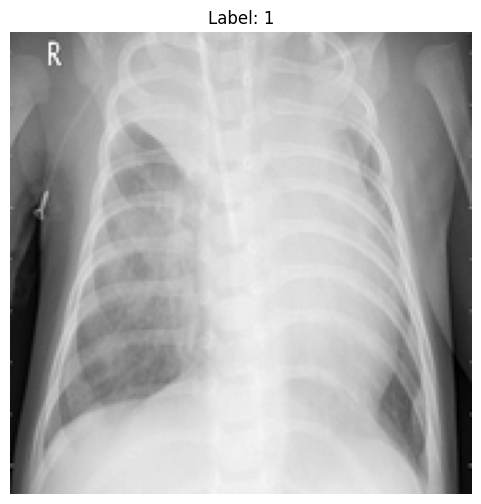


        True Label:   1
Model 1 Prediction:   1
Model 2 Prediction:   1
Model 3 Prediction:   1

             Index:   20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt



###### Update this variable ######
# try values of: 0, 2, 7, 12, 19, 20
pred_index = 20



def display_single_x_ray(image, label):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

display_single_x_ray(X_test[pred_index], y_test[pred_index])

print(f"\n        True Label:   {y_test[pred_index]}")
print(f"Model 1 Prediction:   {y_pred_model_1[pred_index]}")
print(f"Model 2 Prediction:   {y_pred_model_2[pred_index]}")
print(f"Model 3 Prediction:   {y_pred_model_3[pred_index]}\n")
print(f"             Index:   {pred_index}")

## 1.3 Grad-CAM: Model 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os



###### Update this variable ######
# try values of: 7, 11, 15, 21
gradcam_model_1_index = 26




# get true positive indices
model_1_tp = np.where((y_test == 1) & (y_pred_model_1 == 1))[0]

# creating first part of model (inputs to final conv layer)
last_conv_layer = model_1.get_layer("conv2d_2")
last_conv_layer_model = tf.keras.Model(model_1.inputs, last_conv_layer.output)

# creating second part of model (final conv layer to final model layer)
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in ["max_pooling2d_2", "flatten", "dense", "dropout", "dense_1"]:
    x = model_1.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

# generate the Grad-CAM visualization
image = X_test[model_1_tp[gradcam_model_1_index]]


# display original x ray, true label and model prediction
display_single_x_ray(X_test[model_1_tp[gradcam_model_1_index]], y_test[model_1_tp[gradcam_model_1_index]])
print(f"\n        True Label:   {y_test[model_1_tp[gradcam_model_1_index]]}")
print(f"Model 1 Prediction:   {y_pred_model_1[model_1_tp[gradcam_model_1_index]]}\n")
print(f"             Index:   {model_1_tp[gradcam_model_1_index]}\n")


# record the gradients
with tf.GradientTape() as tape:
    inputs = image[np.newaxis, ...]
    last_conv_layer_output = last_conv_layer_model(inputs)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)

# retrieve the gradients
grads = tape.gradient(preds, last_conv_layer_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# convert to numpy arrays
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()

# apply gradient information
for j in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, j] *= pooled_grads[j]

# average, clip (to only obtain positive gradients) and normalize values
gradcam = np.mean(last_conv_layer_output, axis=-1)
gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
gradcam = cv2.resize(gradcam, (180, 180))

# display and save visualization
plt.imshow(image)
plt.imshow(gradcam, cmap='jet', alpha=0.5)
plt.axis('off')

## 1.4 Grad-CAM: Model 3

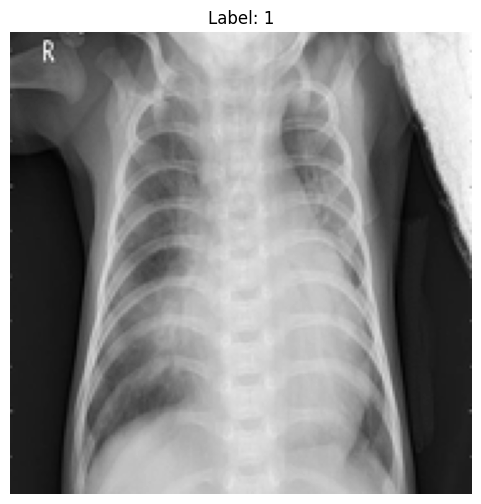


        True Label:   1
Model 3 Prediction:   1

             Index:   45



(-0.5, 179.5, 179.5, -0.5)

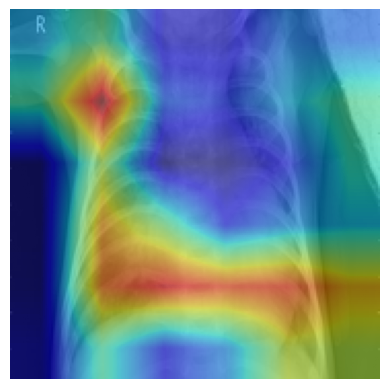

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os



###### Update this variable ######
# try values of: 1, 5, 6, 7, 15, 23, 29
gradcam_model_3_index = 33






# get true positive indices
model_3_tp = np.where((y_test == 1) & (y_pred_model_3 == 1))[0]

# creating first part of model (inputs to final conv layer)
last_conv_layer = model_3.get_layer("conv5_block3_out")
last_conv_layer_model = tf.keras.Model(model_3.inputs, last_conv_layer.output)

# creating second part of model (final conv layer to final model layer)
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in ["global_average_pooling2d", "dense", "dense_1"]:
    x = model_3.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

# generate the Grad-CAM visualization
img_gray_gradcam = X_test[model_3_tp[gradcam_model_3_index]]
image = np.concatenate((img_gray_gradcam, img_gray_gradcam, img_gray_gradcam), axis=2)


# display original x ray, true label and model prediction
display_single_x_ray(X_test[model_3_tp[gradcam_model_3_index]], y_test[model_3_tp[gradcam_model_3_index]])
print(f"\n        True Label:   {y_test[model_3_tp[gradcam_model_3_index]]}")
print(f"Model 3 Prediction:   {y_pred_model_3[model_3_tp[gradcam_model_3_index]]}\n")
print(f"             Index:   {model_3_tp[gradcam_model_3_index]}\n")


# record the gradients
with tf.GradientTape() as tape:
    inputs = image[np.newaxis, ...]
    last_conv_layer_output = last_conv_layer_model(inputs)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)

# retrieve the gradients
grads = tape.gradient(preds, last_conv_layer_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# convert to numpy arrays
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()

# apply gradient information
for j in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, j] *= pooled_grads[j]

# average, clip (to only obtain positive gradients) and normalize values
gradcam = np.mean(last_conv_layer_output, axis=-1)
gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
gradcam = cv2.resize(gradcam, (180, 180))

# display and save visualization
plt.imshow(image)
plt.imshow(gradcam, cmap='jet', alpha=0.5)
plt.axis('off')

# 2. Introduction

As described in the paper, this project involves analyzing X-ray images using Deep Learning techniques to determine whether a patient is likely to have pneumonia or not.

# 3. Preprocessing the Data (Phase 1, locally)

- The dataset includes 5,856 X-ray images. The original dataset was in JPEG format with varying resolutions. Proprocessing was done
to convert the raw data into the "x_ray_full_dataset.h5" file where each x-ray is converted to a 180x180 pixel image in grayscale with associated labels (0 for Normal and 1 for Pneunomia).  

- The original dataset (JPEG images) was too large for Google Colab's memory restrictions. Therefore, preprocessing was completed locally using the following python script ("jpeg_to_hdf5.py"). The following cell is commented out as it was run locally.  

- The below cell processes each X-ray, one-by-one, and converts the dataset into the "x_ray_full_dataset.h5" file, which is essentially a set of arrays for each image. This new format (.h5) is compressed and meets Google Colab's memory restrictions. Using this, we can continue to process the data and build our model.

In [ ]:
"""

import h5py
import numpy as np
from PIL import Image
import os

def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('L')  # grayscale
    img = img.resize(target_size, Image.Resampling.LANCZOS)
    img_array = np.array(img, dtype= np.uint8)
    return img_array

def create_hdf5_dataset(image_folder, hdf5_file, target_size=(224, 224)):
    classes = ['normal', 'pneumonia']
    image_paths = []
    labels = []

    for label, class_name in enumerate(classes):
        class_folder = os.path.join(image_folder, class_name)
        if os.path.isdir(class_folder):
            for image_name in os.listdir(class_folder):
                if image_name.lower().endswith('.jpeg'):
                    image_paths.append(os.path.join(class_folder, image_name))
                    labels.append(label)

    num_images = len(image_paths)

    with h5py.File(hdf5_file, 'w') as hf:
        img_shape = (num_images, target_size[0], target_size[1])
        hf.create_dataset('images', shape=img_shape, dtype='uint8')
        hf.create_dataset('labels', shape=(num_images,), dtype='uint8')

        for i, image_path in enumerate(image_paths):
            img_array = preprocess_image(image_path, target_size)
            hf['images'][i] = img_array
            hf['labels'][i] = labels[i]

            if i % 100 == 0:
                print(f"Processed {i} of {num_images} images.")

    print(f"All images have been saved to {hdf5_file}")

image_folder = 'dataset'
hdf5_file = 'x_ray_full_dataset.h5'
create_hdf5_dataset(image_folder, hdf5_file, target_size=(180, 180))

"""

# 4. Preprocessing the Data (Phase 2, Google Colab)

Once the data was in the .h5 format, it was upload to Google Drive for Colab to access. In the following cells, we:
- Download the "x_ray_full_dataset.h5" data file
- Convert the .h5 data file into numpy arrays
- Complete preprocessing of the data (normalization, splitting, etc)  

Output:
- X_train.shape: (4215, 180, 180, 1)   y_train.shape: (4215,)
- X_test.shape: (1172, 180, 180, 1)   y_test.shape: (1172,)
- X_val.shape: (469, 180, 180, 1)   y_val.shape: (469,)

In [ ]:
# downloading the "x_ray_full_dataset.h5" data file
!pip install gdown
!gdown 1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9

Downloading...
From (original): https://drive.google.com/uc?id=1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9
From (redirected): https://drive.google.com/uc?id=1UbM4BpkTzQ3EuboLwjAX07uPnN8yalJ9&confirm=t&uuid=d5731b0e-5be0-4e6b-8a7c-9fa509a259df
To: /content/x_ray_full_dataset.h5
100% 190M/190M [00:04<00:00, 41.1MB/s]


In [ ]:
# converting the "x_ray_full_dataset.h5" file to numpy arrays
import h5py
import numpy as np

with h5py.File('x_ray_full_dataset.h5', 'r') as h5_file:
    X = np.array(h5_file['images'])
    y = np.array(h5_file['labels'])

print(X.shape, y.shape)

(5856, 180, 180) (5856,)


In [ ]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"X_train.shape: {X_train.shape}   y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}   y_test.shape: {y_test.shape}")
print(f"X_val.shape: {X_val.shape}   y_val.shape: {y_val.shape}")

X_train.shape: (4215, 180, 180, 1)   y_train.shape: (4215,)
X_test.shape: (1172, 180, 180, 1)   y_test.shape: (1172,)
X_val.shape: (469, 180, 180, 1)   y_val.shape: (469,)


Note: A random_state of 42 was used for Models 1 and 2, while a random_state of 0 was used for Model 3.

In the cell below, we display a few sample X-rays.

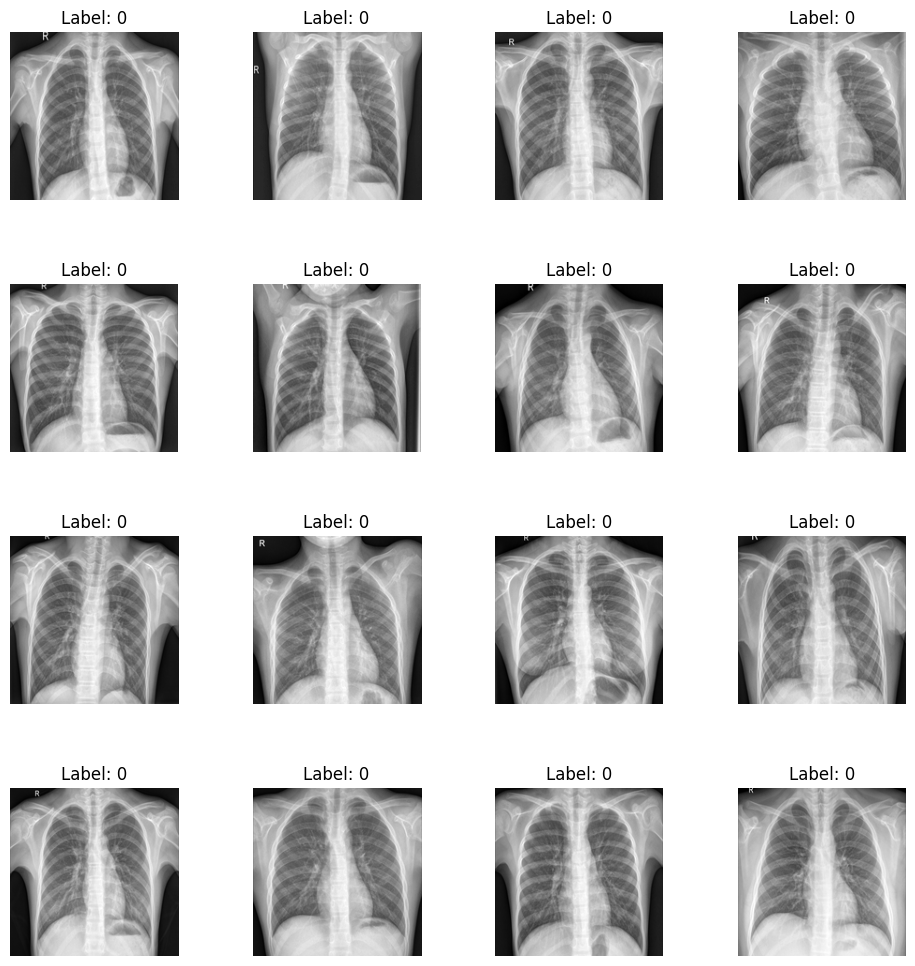

In [ ]:
# displaying the first 16 data points
import numpy as np
import matplotlib.pyplot as plt

def display_x_rays(X, y, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap='gray')
        ax.set_title(f'Label: {y[i]}')
        ax.axis('off')
    plt.show()

display_x_rays(X, y)

# 5. Building and Training Model 1 (Custom CNN Model)

This section of the notebook focuses on Model 1, which is a custom built convolutional neural network (CNN). We conduct the following:
- Building Model 1
- Training Model 1 (training the model took around 1 hr and 45 min)
- Saving Model 1
- Loading Model 1
- Evaluating Model 1 (95.6% accuracy)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

In [ ]:
# building Model 1
def build_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,646,529 (25.35 MB)

 Trainable params: 6,646,529 (25.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training Model 1
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.7355 - loss: 0.5519 - val_accuracy: 0.9041 - val_loss: 0.2707
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.8849 - loss: 0.2628 - val_accuracy: 0.9062 - val_loss: 0.2649
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9214 - loss: 0.1977 - val_accuracy: 0.9254 - val_loss: 0.2208
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9300 - loss: 0.1801 - val_accuracy: 0.9254 - val_loss: 0.2227
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.9375 - loss: 0.1860 - val_accuracy: 0.9318 - val_loss: 0.2150
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.9406 - loss: 0.1632 - val_accuracy: 0.9126 - val_loss: 0.2097
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9480 - loss: 0.1389 - val_accuracy: 0.9254 - val_loss: 0.1989
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9557 - loss: 0.1291 - val_accu

In [ ]:
# saving model 1 (keras format)
model.save('pneumonia_detection_model.keras')

In [ ]:
# downloading the "pneumonia_detection_model.keras" model file
!pip install gdown
!gdown 1meyD_R7w54JJelG56IhGUTKL2CTG1Eso

Downloading...
From (original): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso
From (redirected): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso&confirm=t&uuid=c2f6080e-854d-4c0c-84c6-2c3ca28fe81d
To: /content/pneumonia_detection_model.keras
100% 79.8M/79.8M [00:00<00:00, 84.2MB/s]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

In [ ]:
# loading Model 1 from the Keras format
model = tf.keras.models.load_model('pneumonia_detection_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# evaluating Model 1
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 584ms/step - accuracy: 0.9539 - loss: 0.1189
Test Accuracy: 0.9564846158027649


# 6. Training Model 2 (ResNet-50 Model with one phase of Fine-Tuning)

In the previous section, we completed building and training Model 1 (Custom CNN). We now move on to Model 2, which is based off of the famous ResNet-50 model. ResNet-50 is a CNN that excels at image classification. We use this pre-trained model as a starting point to accelerate training. From here, we remove the last few layers of the model in order to fine-tune the model to our specific use case (pneumonia detection).  

Additionally, the original model (Model 1 - Custom CNN), takes as input a single color channel since our images are grayscale X-rays. However, the ResNet-50 model takes in three color channels. In order to be compatible with the ResNet-50 input shape, we concatenate our data three times for each of the RGB channels, respectively.  

In the cells below, we:

- Build Model 2 (by loading and then modifying the ResNet-50 model)
- Train Model 2 (training Model 2 was much faster than Model 1)
- Save Model 2
- Load Model 2
- Evaluate Model 2 (90.1% accuracy)

In [ ]:
# in this cell, we build Model 2 by loading and then modifying the ResNet-50 model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 180, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 186, 186, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 90, 90, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 90, 90, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 90, 90, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 92, 92, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 45, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 45, 45, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 45, 45, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 45, 45, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 45, 45, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# train Model 2
history = model.fit(
    np.concatenate((X_train,X_train,X_train), axis=3), y_train,
    batch_size=32,
    epochs=30,
)

Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.7239 - loss: 0.5778
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.7256 - loss: 0.5302
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.7433 - loss: 0.4894
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.7633 - loss: 0.4588
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.7869 - loss: 0.4377
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7919 - loss: 0.4228
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8059 - loss: 0.4025
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8252 - loss: 0.3799
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8243 - loss: 0.3798
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8493 - loss: 0.3545
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8403 - loss: 0.3539
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━

In [ ]:
# saving Model 2 (keras format)
model.save('v1_resnet50.keras')

In [ ]:
# downloading the "v1_resnet50.keras" model file
!pip install gdown
!gdown 10_7s75UuntrsneolMDKGJpDMzNYby73F

Downloading...
From (original): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F
From (redirected): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F&confirm=t&uuid=523bdf85-e609-4579-b4be-85f7a402af52
To: /content/v1_resnet50.keras
100% 120M/120M [00:02<00:00, 41.5MB/s]


In [ ]:
# loading Model 2 from the Keras format
model = tf.keras.models.load_model('v1_resnet50.keras')

In [ ]:
# evaluating Model 2
test_loss, test_acc = model.evaluate(np.concatenate((X_test,X_test,X_test), axis=3), y_test)
print(f'Test Accuracy: {test_acc}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - accuracy: 0.9073 - loss: 0.2316
Test Accuracy: 0.9010238647460938


# 7. Training Model 3 (ResNet-50 Model with two phases of Fine-Tuning)

The last model we analyze is another fine-tuned model based off of the aforementioned ResNet-50 model. However, Model 3 differs in the fact that it underwent two phases of fine-tuning. The first phase is similar to the previous model while the second phase extends fine-tuning out by allowing additional layers to be trained via weight parameters updates.  

Due to memory limitation in Google Colab, we save the model after the first phase of fine-tuning as "v2_resnet50.keras". Thereafter, we reload it to continue on to phase two of fine-tuning.  

The cells below complete:
- Phase One of Fine-Tuning
- Phase Two of Fine-Tuning
- Saving, Loading and Evaluating Model 3 (93.3% accuracy)

## 7.1 Phase One of Fine-Tuning

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
# loading the base ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 180, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 186, 186, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 90, 90, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 90, 90, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 90, 90, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 92, 92, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 45, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 45, 45, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 45, 45, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 45, 45, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 45, 45, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 180, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 186, 186, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 90, 90, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 90, 90, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 90, 90, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 92, 92, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 45, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 45, 45, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 45, 45, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 45, 45, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 45, 45, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# train the model
history = model.fit(
    np.concatenate((X_train,X_train,X_train), axis=3), y_train,
    batch_size=32,
    epochs=10,
)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - accuracy: 0.7073 - loss: 0.6082
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7332 - loss: 0.5925
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7357 - loss: 0.5872
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7227 - loss: 0.5973
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7263 - loss: 0.5936
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7264 - loss: 0.5905
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.7162 - loss: 0.6045
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7293 - loss: 0.5901
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7283 - loss: 0.5955
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7325 - loss: 0.5869


In [ ]:
# save the intermediary model (keras format)
model.save('v2_resnet50.keras')

## 7.2 Phase Two of Fine-Tuning

Phase Two of Fine-Tuning pickes up from the last section and continues the fine-tuning process:

In [ ]:
# downloading the "v2_resnet50.keras" model file
!pip install gdown
!gdown 1cKxXRwqVPEwGeNUe7yv_3pE4l-L_MH38

Downloading...
From (original): https://drive.google.com/uc?id=1cKxXRwqVPEwGeNUe7yv_3pE4l-L_MH38
From (redirected): https://drive.google.com/uc?id=1cKxXRwqVPEwGeNUe7yv_3pE4l-L_MH38&confirm=t&uuid=09245268-a122-4279-bc46-cc03c62dfc93
To: /content/v2_resnet50.keras
100% 120M/120M [00:03<00:00, 37.0MB/s]


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('v2_resnet50.keras')

In [ ]:
from tensorflow.keras.optimizers import Adam

# freeze the initial base model layers
for layer in model.layers[:-23]:
    layer.trainable = False

# unfreeze the remaining layers
for layer in model.layers[-23:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

# continue fine-tuning
history_finetuned = model.fit(
    np.concatenate((X_train,X_train,X_train), axis=3), y_train,
    batch_size=32,
    epochs=10,
)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 46s 135ms/step - accuracy: 0.8219 - loss: 0.3832
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9415 - loss: 0.1589
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9518 - loss: 0.1210
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9487 - loss: 0.1271
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9648 - loss: 0.1035
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9639 - loss: 0.0968
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9651 - loss: 0.0903
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9654 - loss: 0.0897
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9706 - loss: 0.0820
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9634 - loss: 0.0893


## 7.3 Saving, Loading and Evaluating Model 3

In [ ]:
# save Model 3 (keras format)
model.save('v3_resnet50.keras')

In [ ]:
# downloading the "v3_resnet50.keras" model file
!pip install gdown
!gdown 1SjIa614iaKPark3mWva6A_L-wYRAZaoq

In [ ]:
# loading Model 3 from the Keras format
model = tf.keras.models.load_model('v3_resnet50.keras')

In [ ]:
# evaluate Model 3
test_loss, test_acc = model.evaluate(np.concatenate((X_test,X_test,X_test), axis=3), y_test)
print(f'Test Accuracy: {test_acc}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9247 - loss: 0.2092
Test Accuracy: 0.9334471225738525


# 8. Model Evaluations

Thus far, we have built and trained three models:
- Model 1: Custom CNN
- Model 2: ResNet-50 Model with one phase of Fine-Tuning
- Model 3: ResNet-50 Model with two phases of Fine-Tuning  

In this section of the notebook, we will evaluate the three models more thoroughly using the following metrics:
- Accuracy
- Precision
- Recall
- F1 Scores  

We will construct confusion matrices that summarize this information and allow us to understand the model performances more deeply.



## 8.1 Model 1: Custom CNN

We first download the model, and then evaluate it to obtain the model performance metrics and construct the confusion matrix.

In [ ]:
# downloading the "pneumonia_detection_model.keras" data file
!pip install gdown
!gdown 1meyD_R7w54JJelG56IhGUTKL2CTG1Eso

Downloading...
From (original): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso
From (redirected): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso&confirm=t&uuid=fb4b1f2f-bee2-4400-9495-f20ced618b2a
To: /content/pneumonia_detection_model.keras
100% 79.8M/79.8M [00:01<00:00, 56.3MB/s]


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.9564846416382252
Precision: 0.9577464788732394
Recall: 0.9819494584837545
F1 Score: 0.9696969696969697

Confusion Matrix:
 [[816  15]
 [ 36 305]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.89      0.92       341
   Pneumonia       0.96      0.98      0.97       831

    accuracy                           0.96      1172
   macro avg       0.96      0.94      0.95      1172
weighted avg       0.96      0.96      0.96      1172



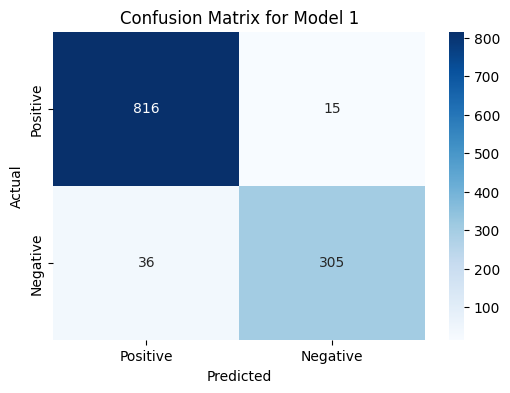

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# load the model
model = tf.keras.models.load_model("pneumonia_detection_model.keras")

# predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# confusion matrix
labels = [1, 0]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print("\nConfusion Matrix:\n", conf_matrix)

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Pneumonia"]))

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Model 1")
plt.show()

## 8.2 Model 2: ResNet-50 Model with one phase of Fine-Tuning

Once again, we first download the model, and then evaluate it to obtain the model performance metrics and construct the confusion matrix.

In [ ]:
# downloading the "v1_resnet50.keras" model file
!pip install gdown
!gdown 10_7s75UuntrsneolMDKGJpDMzNYby73F

Downloading...
From (original): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F
From (redirected): https://drive.google.com/uc?id=10_7s75UuntrsneolMDKGJpDMzNYby73F&confirm=t&uuid=e126f6fc-0726-47ec-a652-c14b6858b32c
To: /content/v1_resnet50.keras
100% 120M/120M [00:01<00:00, 77.2MB/s]


37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step
Accuracy: 0.9010238907849829
Precision: 0.9171528588098017
Recall: 0.9458483754512635
F1 Score: 0.9312796208530806

Confusion Matrix:
 [[786  45]
 [ 71 270]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.79      0.82       341
   Pneumonia       0.92      0.95      0.93       831

    accuracy                           0.90      1172
   macro avg       0.89      0.87      0.88      1172
weighted avg       0.90      0.90      0.90      1172



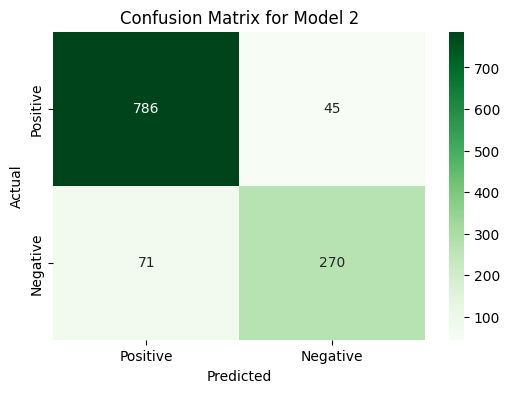

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# load the model
model = tf.keras.models.load_model("v1_resnet50.keras")

# predictions
y_pred_probs = model.predict(np.concatenate((X_test,X_test,X_test), axis=3))
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# confusion matrix
labels = [1, 0]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print("\nConfusion Matrix:\n", conf_matrix)

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Pneumonia"]))

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Model 2")
plt.show()

## 8.3 Model 3: ResNet-50 Model with two phases of Fine-Tuning

Lastly, we repeat similar steps for Model 3.

In [ ]:
# downloading the "v3_resnet50.keras" model file
!pip install gdown
!gdown 1SjIa614iaKPark3mWva6A_L-wYRAZaoq

Downloading...
From (original): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq
From (redirected): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq&confirm=t&uuid=dc00065a-102d-43f7-a4ce-cbf4889a3e0e
To: /content/v3_resnet50.keras
100% 192M/192M [00:01<00:00, 136MB/s]


37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step
Accuracy: 0.9334470989761092
Precision: 0.9228295819935691
Recall: 0.9930795847750865
F1 Score: 0.9566666666666667

Confusion Matrix:
 [[861   6]
 [ 72 233]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.76      0.86       305
   Pneumonia       0.92      0.99      0.96       867

    accuracy                           0.93      1172
   macro avg       0.95      0.88      0.91      1172
weighted avg       0.94      0.93      0.93      1172



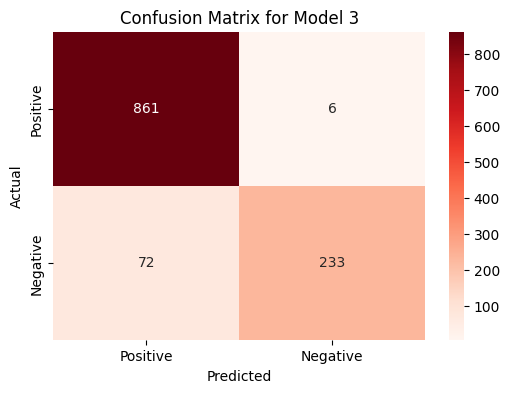

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# load the model
model = tf.keras.models.load_model("v3_resnet50.keras")

# predictions
y_pred_probs = model.predict(np.concatenate((X_test,X_test,X_test), axis=3))
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# confusion matrix
labels = [1, 0]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print("\nConfusion Matrix:\n", conf_matrix)

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Pneumonia"]))

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Model 3")
plt.show()

# 9. Grad-CAM Visualizations

The final step of this project is to use the Grad-CAM method to visualize via heatmaps the more significant areas of the X-rays that impact the models' decisions. In this way, we can see which areas of the X-rays are of more concern. Below, we complete this for both the Custom CNN model (Model 1) as well as for the ResNet-50 fine-tuned model (Model 3). When analyzing the results, we observe that regions of the chest area are highlighted in some images. However, the heatmaps often highlight non-relevant regions outside the chest area, especially artifacts. This demonstrates the need for further refinement and model improvement.

## 9.1 Custom CNN model (Model 1)

In the cells below, we do the following:
1. Loading the model and making predictions.
2. Extracting the indices of true and false positive results.
3. Applying Grad-CAM to the true positive results.
4. Applying Grad-CAM to the false positive results.

### 1. Loading the model and making predictions.

In [ ]:
# downloading the "pneumonia_detection_model.keras" model file
!pip install gdown
!gdown 1meyD_R7w54JJelG56IhGUTKL2CTG1Eso

Downloading...
From (original): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso
From (redirected): https://drive.google.com/uc?id=1meyD_R7w54JJelG56IhGUTKL2CTG1Eso&confirm=t&uuid=316810ae-3ea9-416a-b2f3-2ee1f78b143b
To: /content/pneumonia_detection_model.keras
100% 79.8M/79.8M [00:02<00:00, 36.3MB/s]


In [ ]:
import tensorflow as tf

# load the model
model = tf.keras.models.load_model("pneumonia_detection_model.keras")

# predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


### 2. Extracting the indices of true and false positive results.

In [ ]:
import numpy as np

i_y_test_pos = np.where(y_test == 1)[0]  # indices of actual positives
i_y_test_neg = np.where(y_test == 0)[0]  # indices of actual negatives

i_y_pred_pos = np.where(y_pred == 1)[0]  # indices of predicted positives
i_y_pred_neg = np.where(y_pred == 0)[0]  # indices of predicted negatives

tp = np.intersect1d(i_y_test_pos, i_y_pred_pos)  # true positives
fp = np.intersect1d(i_y_test_neg, i_y_pred_pos)  # false positives
tn = np.intersect1d(i_y_test_neg, i_y_pred_neg)  # true negatives
fn = np.intersect1d(i_y_test_pos, i_y_pred_neg)  # false negatives

print(f"Total length of y_test: {len(y_test)}")
print(f"Total length of positive y_test: {len(i_y_test_pos)}")
print(f"Total length of negative y_test: {len(i_y_test_neg)}")
print(f"Total length of positive y_pred: {len(i_y_pred_pos)}")
print(f"Total length of negative y_pred: {len(i_y_pred_neg)}")

print("\nConfusion Matrix Elements:")
print(f"True Positives (TP): {len(tp)}")
print(f"False Positives (FP): {len(fp)}")
print(f"True Negatives (TN): {len(tn)}")
print(f"False Negatives (FN): {len(fn)}")

Total length of y_test: 1172
Total length of positive y_test: 831
Total length of negative y_test: 341
Total length of positive y_pred: 852
Total length of negative y_pred: 320

Confusion Matrix Elements:
True Positives (TP): 816
False Positives (FP): 36
True Negatives (TN): 305
False Negatives (FN): 15


### 3. Applying Grad-CAM to the true positive results.

Processing image index: 0


<ipython-input-22-d53a924662e8>:48: RuntimeWarning: invalid value encountered in divide
  gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)


Processing image index: 1
Processing image index: 5
Processing image index: 7
Processing image index: 8
Processing image index: 9
Processing image index: 10
Processing image index: 11
Processing image index: 13
Processing image index: 14
Processing image index: 18
Processing image index: 21
Processing image index: 22
Processing image index: 23
Processing image index: 25
Processing image index: 26
Processing image index: 27
Processing image index: 28
Processing image index: 30
Processing image index: 31
Processing image index: 32
Processing image index: 33
Processing image index: 34
Processing image index: 35
Processing image index: 36
updating: content/gradcam_model_1_tp/ (stored 0%)
updating: content/gradcam_model_1_tp/gradcam_0.png (deflated 0%)
updating: content/gradcam_model_1_tp/gradcam_11.png (deflated 0%)
updating: content/gradcam_model_1_tp/gradcam_26.png (deflated 0%)
updating: content/gradcam_model_1_tp/gradcam_36.png (deflated 0%)
updating: content/gradcam_model_1_tp/gradcam

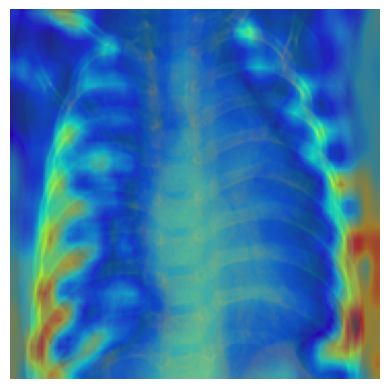

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

# creating first part of model (inputs to final conv layer)
last_conv_layer = model.get_layer("conv2d_2")
last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

# creating second part of model (final conv layer to final model layer)
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in ["max_pooling2d_2", "flatten", "dense", "dropout", "dense_1"]:
    x = model.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

# making a folder directory for the gradcam outputs
if not os.path.exists("/content/gradcam_model_1_tp"):
    os.makedirs("/content/gradcam_model_1_tp")

# generate the Grad-CAM visualization
for i in tp[:25]:
    print(f"Processing image index: {i}")
    image = X_test[i]

    # record the gradients
    with tf.GradientTape() as tape:
        inputs = image[np.newaxis, ...]
        last_conv_layer_output = last_conv_layer_model(inputs)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)

    # retrieve the gradients
    grads = tape.gradient(preds, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # convert to numpy arrays
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    # apply gradient information
    for j in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, j] *= pooled_grads[j]

    # average, clip (to only obtain positive gradients) and normalize values
    gradcam = np.mean(last_conv_layer_output, axis=-1)
    gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
    gradcam = cv2.resize(gradcam, (180, 180))

    # display and save visualization
    plt.imshow(image)
    plt.imshow(gradcam, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.savefig(f"gradcam_model_1_tp/gradcam_{i}.png", format="png", bbox_inches="tight", pad_inches=0)

!zip -r gradcam_model_1_tp.zip /content/gradcam_model_1_tp

### 4. Applying Grad-CAM to the false positive results.

Processing image index: 2
Processing image index: 4
Processing image index: 126
Processing image index: 138
Processing image index: 192
Processing image index: 199
Processing image index: 202
Processing image index: 215
Processing image index: 231
Processing image index: 315
Processing image index: 319
Processing image index: 320
Processing image index: 340
Processing image index: 379
Processing image index: 419
Processing image index: 444
Processing image index: 479
Processing image index: 490
Processing image index: 502
Processing image index: 559
Processing image index: 561
Processing image index: 608
Processing image index: 662
Processing image index: 685
Processing image index: 869
  adding: content/gradcam_model_1_fp/ (stored 0%)
  adding: content/gradcam_model_1_fp/gradcam_444.png (deflated 0%)
  adding: content/gradcam_model_1_fp/gradcam_202.png (deflated 0%)
  adding: content/gradcam_model_1_fp/gradcam_490.png (deflated 0%)
  adding: content/gradcam_model_1_fp/gradcam_319.png 

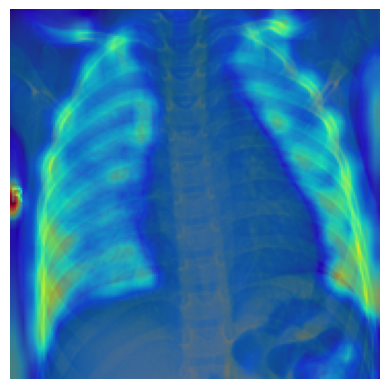

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

# creating first part of model (inputs to final conv layer)
last_conv_layer = model.get_layer("conv2d_2")
last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

# creating second part of model (final conv layer to final model layer)
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in ["max_pooling2d_2", "flatten", "dense", "dropout", "dense_1"]:
    x = model.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

# making a folder directory for the gradcam outputs
if not os.path.exists("/content/gradcam_model_1_fp"):
    os.makedirs("/content/gradcam_model_1_fp")

# generate the Grad-CAM visualization
for i in fp[:25]:
    print(f"Processing image index: {i}")
    image = X_test[i]

    # record the gradients
    with tf.GradientTape() as tape:
        inputs = image[np.newaxis, ...]
        last_conv_layer_output = last_conv_layer_model(inputs)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)

    # retrieve the gradients
    grads = tape.gradient(preds, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # convert to numpy arrays
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    # apply gradient information
    for j in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, j] *= pooled_grads[j]

    # average, clip (to only obtain positive gradients) and normalize values
    gradcam = np.mean(last_conv_layer_output, axis=-1)
    gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
    gradcam = cv2.resize(gradcam, (180, 180))

    # display and save visualization
    plt.imshow(image)
    plt.imshow(gradcam, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.savefig(f"gradcam_model_1_fp/gradcam_{i}.png", format="png", bbox_inches="tight", pad_inches=0)

!zip -r gradcam_model_1_fp.zip /content/gradcam_model_1_fp

## 9.2 ResNet-50 fine-tuned model (Model 3)

In the cells below, we do the following:
1. Loading the model and making predictions.
2. Extracting the indices of true and false positive results.
3. Applying Grad-CAM to the true positive results.
4. Applying Grad-CAM to the false positive results.

### 1. Loading the model and making predictions.

In [ ]:
# downloading the "v3_resnet50.keras" model file
!pip install gdown
!gdown 1SjIa614iaKPark3mWva6A_L-wYRAZaoq

Downloading...
From (original): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq
From (redirected): https://drive.google.com/uc?id=1SjIa614iaKPark3mWva6A_L-wYRAZaoq&confirm=t&uuid=9f580aec-8d3f-4fa5-92f1-05592e2baedb
To: /content/v3_resnet50.keras
100% 192M/192M [00:04<00:00, 38.9MB/s]


In [ ]:
import tensorflow as tf

# load the model
model = tf.keras.models.load_model("v3_resnet50.keras")

# predictions
y_pred_probs = model.predict(np.concatenate((X_test,X_test,X_test), axis=3))
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 338ms/step


### 2. Extracting the indices of true and false positive results.

In [ ]:
import numpy as np

i_y_test_pos = np.where(y_test == 1)[0]  # indices of actual positives
i_y_test_neg = np.where(y_test == 0)[0]  # indices of actual negatives

i_y_pred_pos = np.where(y_pred == 1)[0]  # indices of predicted positives
i_y_pred_neg = np.where(y_pred == 0)[0]  # indices of predicted negatives

tp = np.intersect1d(i_y_test_pos, i_y_pred_pos)  # true positives
fp = np.intersect1d(i_y_test_neg, i_y_pred_pos)  # false positives
tn = np.intersect1d(i_y_test_neg, i_y_pred_neg)  # true negatives
fn = np.intersect1d(i_y_test_pos, i_y_pred_neg)  # false negatives

print(f"Total length of y_test: {len(y_test)}")
print(f"Total length of positive y_test: {len(i_y_test_pos)}")
print(f"Total length of negative y_test: {len(i_y_test_neg)}")
print(f"Total length of positive y_pred: {len(i_y_pred_pos)}")
print(f"Total length of negative y_pred: {len(i_y_pred_neg)}")

print("\nConfusion Matrix Elements:")
print(f"True Positives (TP): {len(tp)}")
print(f"False Positives (FP): {len(fp)}")
print(f"True Negatives (TN): {len(tn)}")
print(f"False Negatives (FN): {len(fn)}")

Total length of y_test: 1172
Total length of positive y_test: 867
Total length of negative y_test: 305
Total length of positive y_pred: 933
Total length of negative y_pred: 239

Confusion Matrix Elements:
True Positives (TP): 861
False Positives (FP): 72
True Negatives (TN): 233
False Negatives (FN): 6


### 3. Applying Grad-CAM to the true positive results.

Processing image index: 0
Processing image index: 3
Processing image index: 4
Processing image index: 5
Processing image index: 7
Processing image index: 9
Processing image index: 10
Processing image index: 11
Processing image index: 12
Processing image index: 13
Processing image index: 14
Processing image index: 15
Processing image index: 16
Processing image index: 17
Processing image index: 20
Processing image index: 22
Processing image index: 24
Processing image index: 26
Processing image index: 28
Processing image index: 29
Processing image index: 30
Processing image index: 31
Processing image index: 32
Processing image index: 33
Processing image index: 34
  adding: content/gradcam_model_3_tp/ (stored 0%)
  adding: content/gradcam_model_3_tp/gradcam_0.png (deflated 0%)
  adding: content/gradcam_model_3_tp/gradcam_11.png (deflated 0%)
  adding: content/gradcam_model_3_tp/gradcam_26.png (deflated 0%)
  adding: content/gradcam_model_3_tp/gradcam_16.png (deflated 0%)
  adding: content/

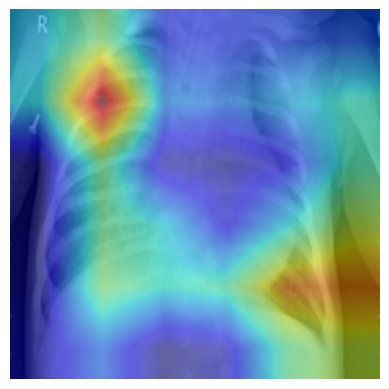

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

# creating first part of model (inputs to final conv layer)
last_conv_layer = model.get_layer("conv5_block3_out")
last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

# creating second part of model (final conv layer to final model layer)
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in ["global_average_pooling2d", "dense", "dense_1"]:
    x = model.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

# making a folder directory for the gradcam outputs
if not os.path.exists("/content/gradcam_model_3_tp"):
    os.makedirs("/content/gradcam_model_3_tp")

# generate the Grad-CAM visualization
for i in tp[:25]:
    print(f"Processing image index: {i}")
    image = np.concatenate((X_test[i], X_test[i], X_test[i]), axis=2)

    # record the gradients
    with tf.GradientTape() as tape:
        inputs = image[np.newaxis, ...]
        last_conv_layer_output = last_conv_layer_model(inputs)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)

    # retrieve the gradients
    grads = tape.gradient(preds, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # convert to numpy arrays
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    # apply gradient information
    for j in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, j] *= pooled_grads[j]

    # average, clip (to only obtain positive gradients) and normalize values
    gradcam = np.mean(last_conv_layer_output, axis=-1)
    gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
    gradcam = cv2.resize(gradcam, (180, 180))

    # display and save visualization
    plt.imshow(image)
    plt.imshow(gradcam, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.savefig(f"gradcam_model_3_tp/gradcam_{i}.png", format="png", bbox_inches="tight", pad_inches=0)

!zip -r gradcam_model_3_tp.zip /content/gradcam_model_3_tp

### 4. Applying Grad-CAM to the false positive results.

Processing image index: 2
Processing image index: 21
Processing image index: 47
Processing image index: 52
Processing image index: 67
Processing image index: 69
Processing image index: 73
Processing image index: 75
Processing image index: 79
Processing image index: 86
Processing image index: 111
Processing image index: 137
Processing image index: 146
Processing image index: 150
Processing image index: 173
Processing image index: 182
Processing image index: 201
Processing image index: 218
Processing image index: 267
Processing image index: 318
Processing image index: 326
Processing image index: 343
Processing image index: 369
Processing image index: 377
Processing image index: 379
  adding: content/gradcam_model_3_fp/ (stored 0%)
  adding: content/gradcam_model_3_fp/gradcam_182.png (deflated 0%)
  adding: content/gradcam_model_3_fp/gradcam_146.png (deflated 0%)
  adding: content/gradcam_model_3_fp/gradcam_369.png (deflated 0%)
  adding: content/gradcam_model_3_fp/gradcam_201.png (deflat

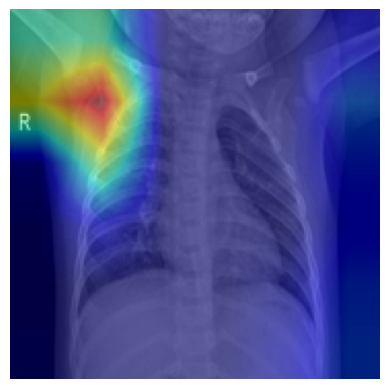

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

# creating first part of model (inputs to final conv layer)
last_conv_layer = model.get_layer("conv5_block3_out")
last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

# creating second part of model (final conv layer to final model layer)
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in ["global_average_pooling2d", "dense", "dense_1"]:
    x = model.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

# making a folder directory for the gradcam outputs
if not os.path.exists("/content/gradcam_model_3_fp"):
    os.makedirs("/content/gradcam_model_3_fp")

# generate the Grad-CAM visualization
for i in fp[:25]:
    print(f"Processing image index: {i}")
    image = np.concatenate((X_test[i], X_test[i], X_test[i]), axis=2)

    # record the gradients
    with tf.GradientTape() as tape:
        inputs = image[np.newaxis, ...]
        last_conv_layer_output = last_conv_layer_model(inputs)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)

    # retrieve the gradients
    grads = tape.gradient(preds, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # convert to numpy arrays
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    # apply gradient information
    for j in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, j] *= pooled_grads[j]

    # average, clip (to only obtain positive gradients) and normalize values
    gradcam = np.mean(last_conv_layer_output, axis=-1)
    gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
    gradcam = cv2.resize(gradcam, (180, 180))

    # display and save visualization
    plt.imshow(image)
    plt.imshow(gradcam, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.savefig(f"gradcam_model_3_fp/gradcam_{i}.png", format="png", bbox_inches="tight", pad_inches=0)

!zip -r gradcam_model_3_fp.zip /content/gradcam_model_3_fp

Having completed the Grad-CAM visualizations, we have achieved all the project objectives.